<a href="https://colab.research.google.com/github/dturk0610/DATA200S/blob/main/data200s_CV_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
import sys
sys.path.insert(1, '/content/drive/MyDrive/Colab Notebooks')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import json
from data_utils import get_images, get_labels
from feature_utils import *
import os
import seaborn as sns

In [ ]:
disaster_list = ["socal-fire", "midwest-flooding", "hurricane-matthew"]

data = {}
split = "train"
with open('/content/drive/MyDrive/Colab Notebooks/config.json') as config_file:
    config = json.load(config_file)
    data_dir = config['data_dir']

for disaster in disaster_list:
    print(f"Loading {split} images and labels for {disaster} dataset...")
    images = get_images(data_dir, disaster, split=split)
    labels = get_labels(data_dir, disaster, split=split)
    data[disaster] = {'disaster':np.repeat(disaster, len(images)), "images": images, "labels": labels}


Loading train images and labels for socal-fire dataset...
Loading train images and labels for midwest-flooding dataset...
Loading train images and labels for hurricane-matthew dataset...


In [ ]:
social_fire_df = pd.DataFrame.from_dict(data['socal-fire'])
midwest_flood_df = pd.DataFrame.from_dict(data['midwest-flooding'])
hurricane_matt_df = pd.DataFrame.from_dict(data['hurricane-matthew'])
dis_type_df = pd.concat([social_fire_df, midwest_flood_df])

In [ ]:
display(dis_type_df.head(10))
display(hurricane_matt_df.head(10))

,disaster,images,labels
0,socal-fire,"[[[50, 72, 48], [49, 71, 47], [49, 71, 48], [4...",0
1,socal-fire,"[[[66, 84, 80], [79, 99, 94], [103, 127, 120],...",0
2,socal-fire,"[[[74, 107, 95], [74, 106, 95], [70, 100, 91],...",0
3,socal-fire,"[[[100, 114, 111], [102, 115, 112], [105, 117,...",0
4,socal-fire,"[[[67, 100, 90], [65, 98, 88], [60, 92, 82], [...",0
5,socal-fire,"[[[59, 82, 71], [50, 72, 63], [47, 68, 60], [5...",0
6,socal-fire,"[[[79, 99, 102], [78, 97, 100], [81, 100, 104]...",0
7,socal-fire,"[[[62, 85, 77], [69, 93, 84], [71, 94, 85], [7...",0
8,socal-fire,"[[[164, 185, 189], [162, 183, 187], [159, 180,...",0
9,socal-fire,"[[[89, 117, 120], [90, 117, 121], [90, 117, 12...",0


,disaster,images,labels
0,hurricane-matthew,"[[[58, 94, 83], [60, 97, 86], [61, 98, 86], [6...",3
1,hurricane-matthew,"[[[150, 177, 183], [147, 174, 182], [153, 180,...",0
2,hurricane-matthew,"[[[59, 81, 75], [53, 75, 69], [47, 68, 62], [5...",1
3,hurricane-matthew,"[[[194, 209, 205], [137, 161, 157], [99, 127, ...",0
4,hurricane-matthew,"[[[127, 156, 147], [134, 165, 159], [129, 162,...",2
5,hurricane-matthew,"[[[47, 73, 59], [46, 72, 58], [50, 78, 63], [5...",1
6,hurricane-matthew,"[[[80, 106, 85], [62, 82, 61], [58, 76, 54], [...",2
7,hurricane-matthew,"[[[115, 139, 145], [109, 133, 138], [119, 145,...",1
8,hurricane-matthew,"[[[90, 108, 101], [90, 107, 100], [86, 103, 94...",1
9,hurricane-matthew,"[[[51, 73, 56], [48, 70, 53], [50, 73, 55], [5...",1


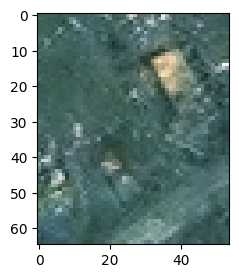

In [ ]:
plt.figure(figsize=(3,3))
plt.imshow(hurricane_matt_df['images'].iloc[0])

In [ ]:
hurricane_matt_df['norm images'] = hurricane_matt_df['images'].apply(lambda x: (x-x.mean())/x.std())

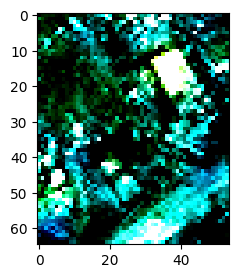

In [ ]:
plt.figure(figsize=(3,3))
plt.imshow(hurricane_matt_df['norm images'].iloc[0])

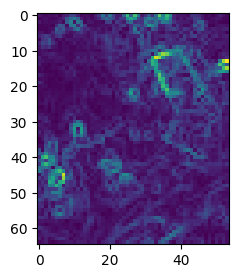

In [ ]:
sobel_img = get_sobel_features(hurricane_matt_df['images'].iloc[0])

plt.figure(figsize=(3,3))
plt.imshow(sobel_img)

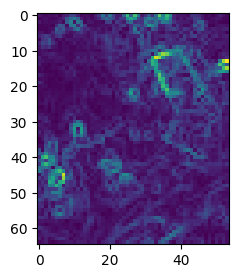

In [ ]:
sobel_img = get_sobel_features(hurricane_matt_df['norm images'].iloc[0])

plt.figure(figsize=(3,3))
plt.imshow(sobel_img)

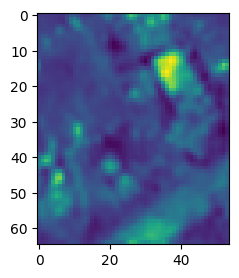

In [ ]:
kernel_gabor = generate_gabor_kernel(theta=0, sigma=1.0, frequency=0.1)
gabor_img = get_gabor_features(hurricane_matt_df['images'].iloc[0], kernel_gabor)

plt.figure(figsize=(3,3))
plt.imshow(gabor_img)

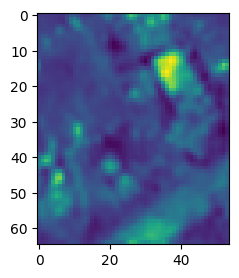

In [ ]:
kernel_gabor = generate_gabor_kernel(theta=0, sigma=1.0, frequency=0.1)
gabor_img = get_gabor_features(hurricane_matt_df['norm images'].iloc[0], kernel_gabor)

plt.figure(figsize=(3,3))
plt.imshow(gabor_img)

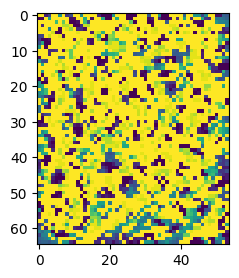

In [ ]:
lbp_img = get_local_binary_pattern(hurricane_matt_df['images'].iloc[0], 3)

plt.figure(figsize=(3,3))
plt.imshow(lbp_img)

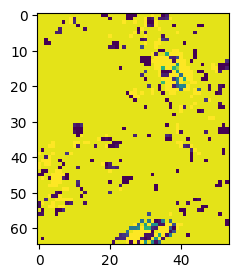

In [ ]:
lbp_img = get_local_binary_pattern(hurricane_matt_df['norm images'].iloc[0], 3)

plt.figure(figsize=(3,3))
plt.imshow(lbp_img)

This is big sad to see since it definitely implies if we want to use lbp, we MUST use it before image normalization.

In [ ]:
hurr_sobel_df = hurricane_matt_df.copy()
hurr_sobel_df['images'] =  hurr_sobel_df['images'].apply(lambda x: get_sobel_features(x))

kernel_gabor = generate_gabor_kernel(theta=0, sigma=1.0, frequency=0.1)
hurr_gabor_df = hurricane_matt_df.copy()
hurr_gabor_df['images'] =  hurr_gabor_df['images'].apply(lambda x: get_gabor_features(x, kernel_gabor))

radius_for_lbp = 3
hurr_lbp_df = hurricane_matt_df.copy()
hurr_lbp_df['images'] =  hurr_lbp_df['images'].apply(lambda x: get_local_binary_pattern(x, radius_for_lbp))

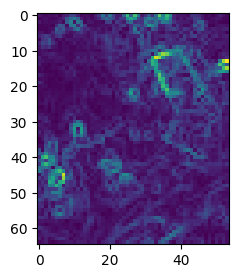

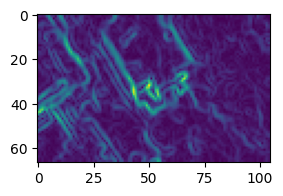

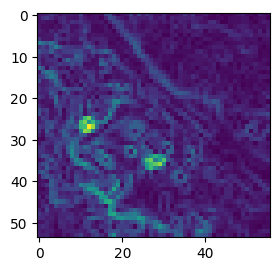

In [ ]:
plt.close('all')

plt.figure(figsize=(3,3))
plt.imshow(hurr_sobel_df['images'].iloc[0])

plt.figure(figsize=(3,3))
plt.imshow(hurr_sobel_df['images'].iloc[1])

plt.figure(figsize=(3,3))
plt.imshow(hurr_sobel_df['images'].iloc[2])

Text(0.5, 1.0, 'Mean Intensity on Hurricane')

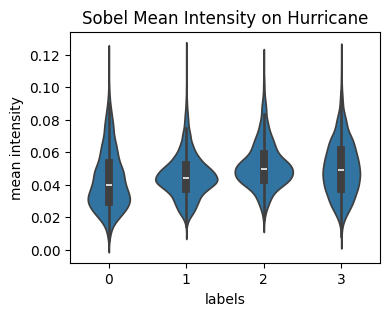

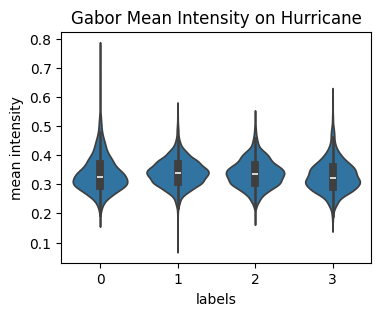

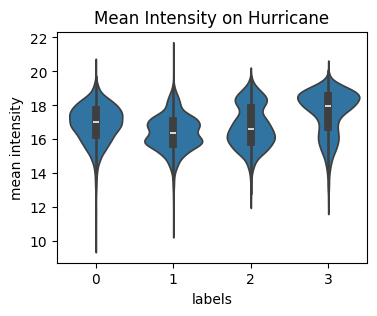

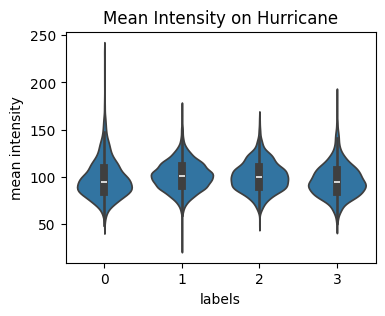

In [ ]:
hurr_sobel_df['mean intensity'] = hurr_sobel_df['images'].apply(lambda x: np.mean(x))
plt.figure(figsize=(4,3))
sns.violinplot(data=hurr_sobel_df, x='labels', y='mean intensity')
plt.title('Sobel Mean Intensity on Hurricane')

hurr_gabor_df['mean intensity'] = hurr_gabor_df['images'].apply(lambda x: np.mean(x))
plt.figure(figsize=(4,3))
sns.violinplot(data=hurr_gabor_df, x='labels', y='mean intensity')
plt.title('Gabor Mean Intensity on Hurricane')

hurr_lbp_df['mean intensity'] = hurr_lbp_df['images'].apply(lambda x: np.mean(x))
plt.figure(figsize=(4,3))
sns.violinplot(data=hurr_lbp_df, x='labels', y='mean intensity')
plt.title('Mean Intensity on Hurricane')

hurricane_matt_df['mean intensity'] = hurricane_matt_df['images'].apply(lambda x: np.mean(x))
plt.figure(figsize=(4,3))
sns.violinplot(data=hurricane_matt_df, x='labels', y='mean intensity')
plt.title('Mean Intensity on Hurricane')

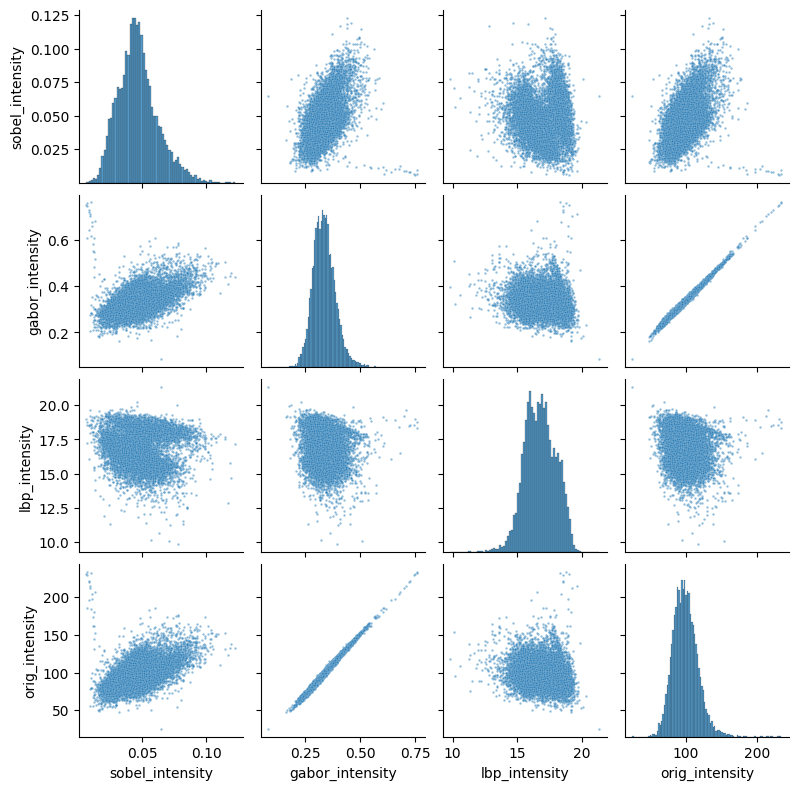

In [ ]:
mean_intensity_df = pd.DataFrame({
    'sobel_intensity': hurr_sobel_df['mean intensity'],
    'gabor_intensity': hurr_gabor_df['mean intensity'],
    'lbp_intensity': hurr_lbp_df['mean intensity'],
    'orig_intensity': hurricane_matt_df['mean intensity'],
})

sns.pairplot(mean_intensity_df, height=2, plot_kws={'s':3, 'alpha':.5})

The nice thing about this plot is that it helps to point out which features we should no longer include in the model. We can see here just how correlated the gabor_intensity relates to the original intensity of the image. This should make sense since the gabor is mostly just blurring of the image. As we blur more and more we eventually get to the mean pixel value across the image. So this showing their relationship being linear makes sense.